In [1]:
import data_api.client as api

In [2]:
api.default_base_url = 'https://gls.psi.ch/'

In [3]:
api.get_supported_backends()

['gls-archive']

In [4]:
# api.search(".*DXNODE", backends=["gls-archive"], base_url="https://gls.psi.ch/")
api.search(".*DXNODE")

[{'backend': 'gls-archive', 'channels': ['D_TEST_DXNODE']}]

In [9]:
import datetime
now = datetime.datetime.now()
end = now-datetime.timedelta(minutes=1)
start = end-datetime.timedelta(seconds=600)
data = api.get_data(channels=['D_TEST_DXNODE'], start=start, end=end)

[INFO] Querying channels: ['D_TEST_DXNODE']
[INFO] Querying on globalDate between 2018-03-07 11:56:50.361762 and 2018-03-07 12:06:50.361762


In [10]:
data.head()

,pulseId,globalSeconds,eventCount,D_TEST_DXNODE,globalNanoseconds
globalDate,,,,,
2018-03-07T11:56:50.605000000+01:00,-1,1520420210.605,1,50.000,0
2018-03-07T11:56:51.853000000+01:00,-1,1520420211.853,1,51.000,0
2018-03-07T11:56:53.101000000+01:00,-1,1520420213.101,1,53.000,0
2018-03-07T11:56:54.037000000+01:00,-1,1520420214.037,1,54.000,0
2018-03-07T11:56:55.410000000+01:00,-1,1520420215.410,1,55.000,0


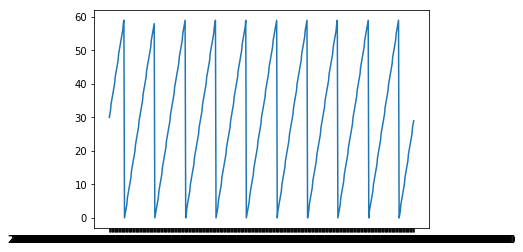

In [7]:
# Plot via Matplotlib
import matplotlib.pyplot as plt
plt.plot(data["D_TEST_DXNODE"])
plt.show()

In [8]:
# Plot via Plotly (requires plotly to be installed)

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# run at the start of every ipython notebook to use plotly.offline
# this injects the plotly.js source files into the notebook
init_notebook_mode(connected=True)

import plotly.graph_objs as go
trace = go.Scatter(
    x = data["globalSeconds"],
    y = data["D_TEST_DXNODE"],
    mode='markers',
    )

iplot([trace])